In [32]:
import pandas as pd
from glob import glob
import datetime as dt
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [33]:
client_denial_information = pd.read_csv('data/5_Tables_that_includes_denial_information_by_client_and_payor_type.csv')
client_denial_information.head(3)

,Trip Date,Job Number,Database,Client Code,Client,Service Type: Name,Market Type,Payor Code,Payor,Trip Status,Call Type,Response Priority,Charge,Post Date,Check Date,Deposit Date,Batch Number,Denial Code,Denial Reason Code,Denial Reason Descr
0,1/1/2017,0209-A,PIT,38,HealthNet Aeromedical Services,Ground Transport,Municipal: Fire Based,8229,Medicare WV Rural,Closed,Rotor,Emergency,0.0,2/16/2017,NaN,2/15/2017,0,76,CO16,Claim/service lacks information which is neede...
1,1/1/2017,0372-A,PIT,47,Canonsburg General Hospital Ambulance Service,Ground Transport,Hospital-based,22,United Healthcare (30555) Commercial,Closed,BLS,Emergency,0.0,11/13/2017,NaN,11/10/2017,0,135,PR27,Expenses incurred after coverage terminated.
2,1/1/2017,0226-A,PIT,35,WCA Services Corporation,Ground Transport,Municipal: Fire Based,7697,14-Erie Co Medicaid,Closed,Rotor,Flight,0.0,5/19/2017,5/1/2017,5/18/2017,0,2825,68,Claim submission date not within required time...


In [4]:
#client_denial_information.shape

In [5]:
#client_denial_information.info()

In [6]:
#client_denial_information[client_denial_information.duplicated(subset=['Trip Date'], keep=False)]

In [34]:
client_denial_information['Database'].value_counts()

PIT    282873
CTA     99092
MW      74456
Name: Database, dtype: int64

In [37]:
# filter dataframe to obtain data from PIT database only
client_denial_information_2 = client_denial_information['Database']=='PIT'
client_denial_information_data = client_denial_information.loc[client_denial_information_2]

#client_denial_information_data.head()

In [5]:
# Change the data types for some of the columns to categorical dtypes used for visualizations
client_denial_information_data['Trip Date'] = pd.to_datetime(client_denial_information_data ['Trip Date'])
client_denial_information_data['Post Date'] = pd.to_datetime(client_denial_information_data ['Post Date'])
#client_denial_information_data['Check Date'] = pd.to_datetime(client_denial_information_data ['Check Date'])
client_denial_information_data['Deposit Date'] = pd.to_datetime(client_denial_information_data ['Deposit Date'])
client_denial_information_data['Market Type'] = client_denial_information_data['Market Type'].astype('category')
client_denial_information_data['Market Type'] = client_denial_information_data['Service Type: Name'].astype('category')
#round(client_denial_information_data.describe(),2)

In [ ]:
#client_denial_information_data.info()

In [35]:
# filter data client_denial_information_data with top 10 denial code

client_denial_information_data_2 = client_denial_information_data['Denial Code'].isin(['86', '88', '106', '155', '476', '481', '541', '1055', '1748', '2298'])
df_client_denial_information_data = client_denial_information_data.loc[ client_denial_information_data_2]
df_client_denial_information_data.head(3)

,Trip Date,Job Number,Database,Client Code,Client,Service Type: Name,Market Type,Payor Code,Payor,Trip Status,Call Type,Response Priority,Charge,Post Date,Check Date,Deposit Date,Batch Number,Denial Code,Denial Reason Code,Denial Reason Descr
4,2017-01-01,0340-A,PIT,46,LifeMed Alaska,Air Transport,Air Transport,8884,MediCARE AK LMAK,Closed,BLS,Non-Emergency,1029.0,2017-01-23,1/19/2017,2017-01-19,134495,2298,PR96,Non-covered charge(s).
5,2017-01-01,0340-A,PIT,46,LifeMed Alaska,Air Transport,Air Transport,8884,MediCARE AK LMAK,Closed,BLS,Non-Emergency,1030.0,2017-01-23,1/19/2017,2017-01-19,134495,2298,PR96,Non-covered charge(s).
14,2017-01-01,0342-A,PIT,46,LifeMed Alaska,Air Transport,Air Transport,8883,MediCAID AK LMAK,Closed,BLS,Non-Emergency,987.0,2017-04-25,4/19/2017,2017-04-21,144173,1055,CO16,Claim lacks information needed for adjudication


In [16]:
#df_client_denial_information_data.isnull().sum()

In [36]:
def missing_data(dataset):
    # Calculate the percentage of missing data in each column
    Total = dataset.isnull().sum().sort_values(ascending = False)
    Percentage = (dataset.isnull().sum()/dataset.isnull().count() * 100).sort_values(ascending = False)
    missing_data = pd.concat([Total, Percentage], axis = 1, keys = ['Total', 'Percentage'])
    return missing_data

In [14]:
#missing_data(df_client_denial_information_data)

In [8]:
# drop rows when any of ['Service Type: Name', 'Market Type', 'Charge', 'Check Date'] reported columns contains a Null value
df_client_denial_information_data.dropna(subset=['Service Type: Name', 'Market Type', 'Charge', 'Check Date'], how='any', inplace=True)

In [9]:
df_client_denial_information_data.isnull().sum()

Trip Date              0
Job Number             0
Database               0
Client Code            0
Client                 0
Service Type: Name     0
Market Type            0
Payor Code             0
Payor                  0
Trip Status            0
Call Type              0
Response Priority      0
Charge                 0
Post Date              0
Check Date             0
Deposit Date           0
Batch Number           0
Denial Code            0
Denial Reason Code     0
Denial Reason Descr    0
dtype: int64

In [10]:
dataset = df_client_denial_information_data.copy()
dataset = dataset.set_index(['Trip Date'])
#display(dataset.head())

In [11]:
# Before we can start performing analysis, we have to resample the datetime 
data_hourly = dataset.resample('H').mean()
#display(data_daily.head())

data_daily = dataset.resample('D').mean()
#display(data_daily.head())

data_weekly = dataset.resample('W').mean()
#display(data_weekly.head())

data_monthly = dataset.resample('M').mean()
#display(data_monthly.head())

data_Quarterly = dataset.resample('Q').mean()
#display(data_Quarterly.head())

data_yearly = dataset.resample('Y').mean()
#display(data_Yearly.head())

In [12]:
# Let's make a copy of the working dataset 
data = dataset.copy()
data.reset_index(inplace=True)

In [20]:
#data.head(3)

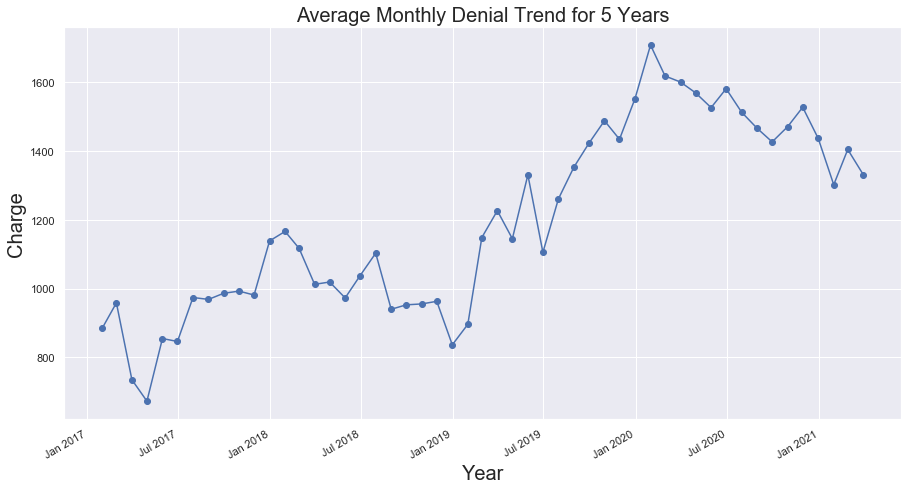

In [13]:
# Plot the yearly data point to ascertain the Monthly trend
plt.figure(figsize=(15,8))
plt.plot(data_monthly.index, data_monthly['Charge'], marker='o')
plt.xlabel('Year', size=20)
plt.ylabel('Charge', size=20)
plt.title('Average Monthly Denial Trend for 5 Years', size=20)
plt.savefig('Average Monthly Denial Trend.png', dpi=300, bbox_inches='tight')
plt.grid(True)
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%b %Y')
plt.gca().xaxis.set_major_formatter(date_format)

In [38]:
data['Payor'].nunique()

487

In [ ]:
# Plot the yearly data point to ascertain the Monthly trend
plt.figure(figsize=(15,8))
plt.plot(data_monthly.index, data_monthly['Charge'], marker='o')
plt.xlabel('Year', size=20)
plt.ylabel('Charge', size=20)
plt.title('Average Monthly Denial Trend for 5 Years', size=20)
plt.savefig('Average Monthly Denial Trend.png', dpi=300, bbox_inches='tight')
plt.grid(True)
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%b %Y')
plt.gca().xaxis.set_major_formatter(date_format)

In [39]:
# Top 10 Payors with the highest charges
grp_payors = data.groupby('Payor')
df_top_10_denial_payors = grp_payors[['Charge']].sum().nlargest(5, columns='Charge')
#df_top_10_denial_payors

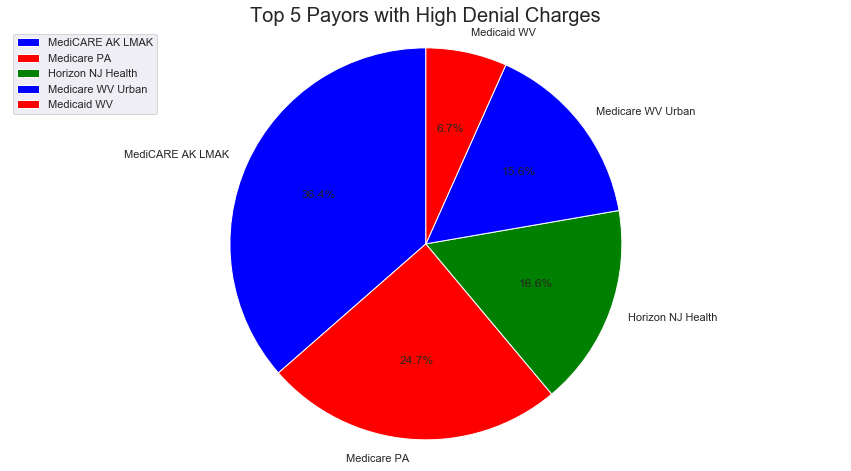

In [40]:
plt.figure(figsize=(15,8))
my_labels = 'MediCARE AK LMAK','Medicare PA','Horizon NJ Health','Medicare WV Urban','Medicaid WV'
#my_labels = 'MediCARE AK LMAK','Medicare PA','Horizon NJ Health','Medicare WV Urban','Medicaid WV','Medicare WV','Medicaid OK','Blue Cross and Blue Shield of West Virginia','Security Blue (MEDICARE HMO)','Medicare OK'
my_colors = ['blue','red','green']
#my_explode = (0, 0.1, 0)-
plt.pie(df_top_10_denial_payors, labels=my_labels, autopct='%1.1f%%', startangle=90, shadow = False, colors=my_colors)
plt.title('Top 5 Payors with High Denial Charges', size=20)
plt.axis('equal')
plt.savefig('Top 5 Payors with High Denial Charges.png', dpi=300, bbox_inches='tight')
plt.legend(loc='upper left')
plt.show()

### Payor Percentage Denial Per Year

In [19]:
data['Month'] = data['Trip Date'].dt.month
data['Year'] = data['Trip Date'].dt.year

In [20]:
# Extract the needed columns
percent_denial_yr = data[['Payor', 'Charge', 'Year', 'Month']]

In [27]:
#percent_denial_yr.head()

In [21]:
percent_denial_yr['Year'].value_counts()

2019    15523
2018    10405
2020     8094
2017     5014
2021     1190
Name: Year, dtype: int64

In [22]:
# filter data for the top 5 Payors, gotten from the above grouping done 

percent_denial_yr_2 = percent_denial_yr['Payor'].isin(['MediCARE AK LMAK', 'Medicare PA', 'Horizon NJ Health', 'Medicare WV Urban'])
df_percent_denial_yr = percent_denial_yr.loc[percent_denial_yr_2]
#df_percent_denial_yr

In [23]:
# Createa yearly dataframe

df_2017denial = df_percent_denial_yr['Year']==2017
df_2017_denial = df_percent_denial_yr.loc[df_2017denial]
#df_2017_denial.sample(6)

df_2018denial = df_percent_denial_yr['Year']==2018
df_2018_denial = df_percent_denial_yr.loc[df_2018denial]
#df_2018_denial.sample(6)

df_2019denial = df_percent_denial_yr['Year']==2019
df_2019_denial = df_percent_denial_yr.loc[df_2019denial]
#df_2019_denial.sample(6)

df_2020denial = df_percent_denial_yr['Year']==2020
df_2020_denial = df_percent_denial_yr.loc[df_2020denial]
#df_2020_denial.sample(6)

df_2021denial = df_percent_denial_yr['Year']==2021
df_2021_denial = df_percent_denial_yr.loc[df_2021denial]
df_2021_denial.sample(6)

,Payor,Charge,Year,Month
39269,MediCARE AK LMAK,1029.0,2021,1
39997,MediCARE AK LMAK,990.0,2021,2
40165,Medicare PA,1581.0,2021,3
39790,Medicare PA,0.0,2021,2
39793,MediCARE AK LMAK,1029.0,2021,2
39273,MediCARE AK LMAK,1029.0,2021,1


In [24]:
grp_payor_denial=df_2017_denial.groupby('Payor')['Charge'].sum()
grp_p = grp_payor_denial.reset_index()
grp_p

,Payor,Charge
0,Horizon NJ Health,1212455.0
1,MediCARE AK LMAK,1194508.0
2,Medicare PA,1145972.0


In [25]:
# Group dataframe using the month column
grp_2017_denial = df_2017_denial.groupby('Month')['Charge'].sum()
grp_2018_denial = df_2018_denial.groupby('Month')['Charge'].sum()
grp_2019_denial = df_2019_denial.groupby('Month')['Charge'].sum()
grp_2020_denial = df_2020_denial.groupby('Month')['Charge'].sum()
grp_2021_denial = df_2021_denial.groupby('Month')['Charge'].sum()

In [26]:
# convert series into dataframe and reset index
df_grp_2017_months = grp_2017_denial.to_frame().reset_index()
df_grp_2018_months = grp_2018_denial.to_frame().reset_index()
df_grp_2019_months = grp_2019_denial.to_frame().reset_index()
df_grp_2020_months = grp_2020_denial.to_frame().reset_index()
df_grp_2021_months = grp_2021_denial.to_frame().reset_index()

In [27]:
df_grp_2018_months.describe().style.format('{:.3f}')

,Month,Charge
count,12.000,12.000
mean,6.500,578440.333
std,3.606,374053.884
min,1.000,300623.000
25%,3.750,382987.750
50%,6.500,457598.500
75%,9.250,614659.500
max,12.000,1658185.000


In [28]:
# Change column names
charges_2017_months = df_grp_2017_months.rename(columns={'Charge':'Charges-2017'})
charges_2018_months = df_grp_2018_months.rename(columns={'Charge':'Charges-2018'})
charges_2019_months = df_grp_2019_months.rename(columns={'Charge':'Charges-2019'})
charges_2020_months = df_grp_2020_months.rename(columns={'Charge':'Charges-2020'})
charges_2021_months = df_grp_2021_months.rename(columns={'Charge':'Charges-2021'})
charges_2021_months.head()

,Month,Charges-2021
0,1,280525.0
1,2,148123.0
2,3,32348.0


### Combine DataFrame

In [29]:
charges_2017_months.columns

Index(['Month', 'Charges-2017'], dtype='object')

In [38]:
charges_2021_months.columns

Index(['Month', 'Charges-2021'], dtype='object')

In [30]:
denial_charges_data_1 = pd.merge(charges_2017_months, charges_2017_months)
denial_charges_data_2 = pd.merge(charges_2019_months, charges_2020_months)
denial_charges_data_3 = pd.merge(denial_charges_data_1, denial_charges_data_2)

In [86]:
#denial_charge = denial_month_data .rename(columns={'Charge':'Total Charge 2017', 'Charge':'Denial Charge 2018'})

In [31]:
denial_charges_data_3.head(12)

,Month,Charges-2017,Charges-2019,Charges-2020
0,1,184040.0,523895.0,606435.0
1,2,185399.0,526030.0,421196.0
2,3,166908.0,479370.0,374860.0
3,4,147843.0,569288.0,307846.0
4,5,216237.0,769338.0,348968.0
5,6,205203.0,660658.0,267752.0
6,7,286498.0,934085.0,283127.0
7,8,281475.0,971748.0,295215.0
8,9,293219.0,1151952.0,315552.0
9,10,235773.0,747297.0,259487.0


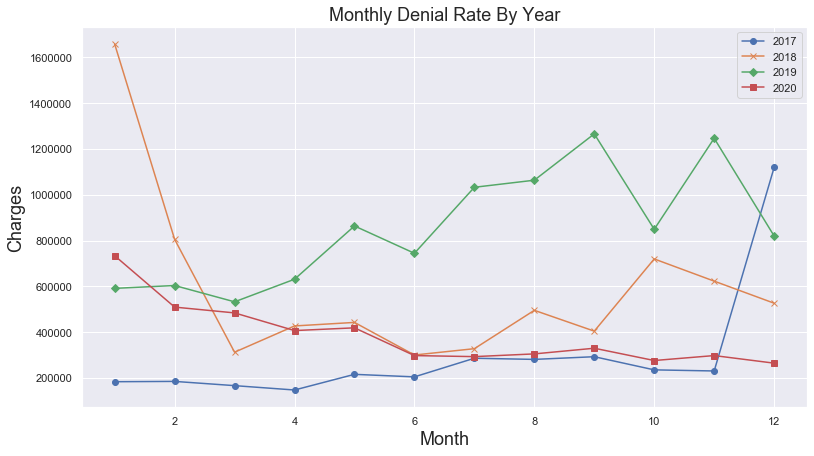

In [109]:
plt.figure(figsize=(13,7))
plt.plot(denial_charges_data_3['Month'], denial_charges_data_3['Charges-2017'], marker='o', label='2017')
plt.plot(denial_charges_data_3['Month'], denial_charges_data_3['Charges-2018'], marker='x', label='2018')
plt.plot(denial_charges_data_3['Month'], denial_charges_data_3['Charges-2019'], marker='D', label='2019')
plt.plot(denial_charges_data_3['Month'], denial_charges_data_3['Charges-2020'], marker='s', label='2020')
plt.title('Monthly Denial Rate By Year', size=18)
plt.xlabel('Month', size=18)
plt.ylabel('Charges', size=18)
plt.savefig('Monthly Denial Rate By Year.png', dpi=300, bbox_inches='tight')
plt.legend()
plt.show()